# Importing the libraries

In [1]:
#Calling all the library which are required for developing classification model

#Importing basic libraries for this classification model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
%matplotlib inline

#Importing the libraries to preprocess the dataset before training ML models
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

#Importing libraries to deal with imbalance dataset
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

#Metrics to check the performance of different ML models
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#Machine Learning model libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import threadpoolctl

# Data Preprocessing

## Importing the E-commerce Dataset

In [2]:
Data = pd.read_csv("E-commerce.csv")

## Understanding the Dataset

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False) 

print('E-commerce Visitor')
Data.head(10)

E-commerce Visitor


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


**From the above result:**
- The given dataset consists of 17 features which are combination of the 10 numerical, 6 categorical and one boolean features.
- There is no missing data in the given dataset.
- The target is the Revenue which is a discrete output.
- Since the output is boolean hence the model is of the classification type.


In [5]:
print('Statistics of the E-commerce Visitor dataset')
Data.describe()

Statistics of the E-commerce Visitor dataset


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


The minimum and maximum values in all the features differ, which could cause issues while training some machine learning models because those models may prioritise features with high values over those with low values. Therefore, I plan to apply Min-Max scaling to all the numerical features and OneHotEncoder to the categorical features in the later stages of the project.

In [6]:
Data.duplicated().value_counts()

False    12205
True       125
dtype: int64

In [7]:
# Use the `duplicated` function to identify duplicated rows
duplicated_rows = Data[Data.duplicated()]

# Print the duplicated rows
duplicated_rows

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


In [8]:
Data.drop_duplicates(inplace=True)

## Checking the linear relation between the independent variables 

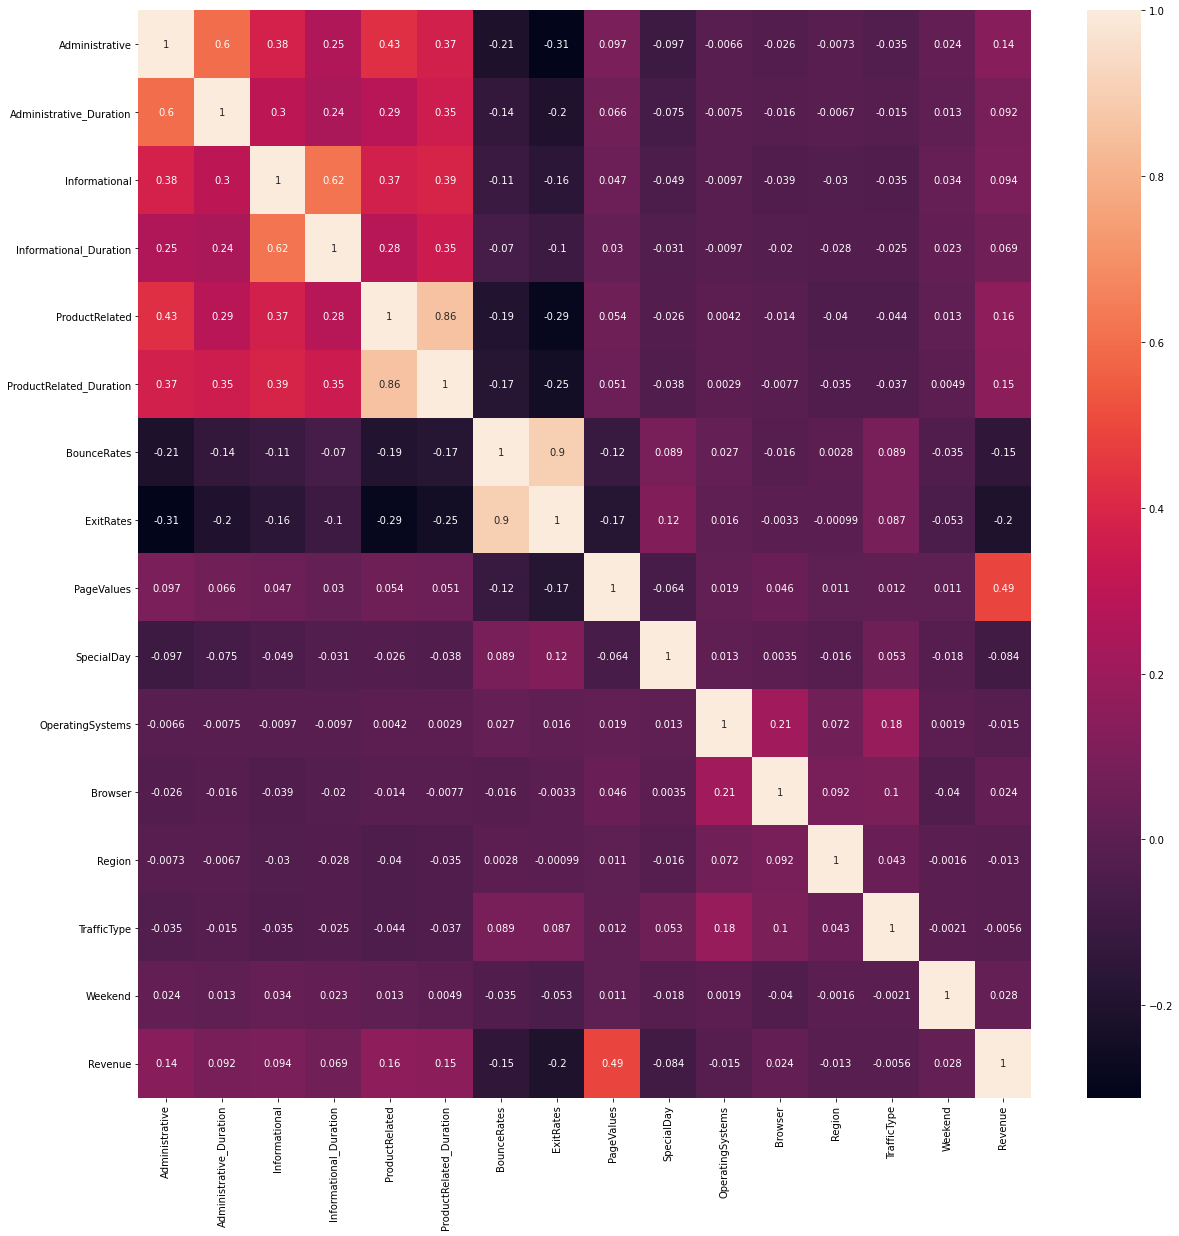

In [9]:
#Checking linear relation between the variables 

corr_matrix = Data.corr()
#Visiual Representation

import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot = True)
plt.show()

Very few features are strongly linearly correlated with each other. This makes it difficult to eliminate features solely based on linear correlations, as they might be non-linearly related to each other. Therefore, in the model training pipeline, a feature selection function is used to identify and retain the features that contribute most effectively to the decision-making process.

In [10]:
#Converting Boolean data into 1 for true or 0 for false
Data['Revenue'] = Data['Revenue'].replace((True, False), (1, 0))
Data['Weekend'] = Data['Weekend'].replace((True, False), (1, 0))

In [11]:
Data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,0,0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,0,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,1,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,0,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,0,0


## Is the given dataset balanced?

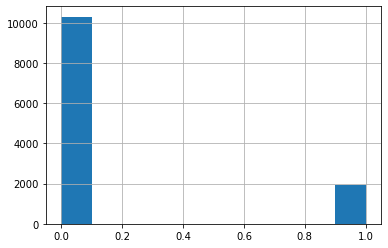

Data with output zero = 84.367% and Data with output one = 15.633%


In [12]:
#Checking the Balance of the Data

z = Data['Revenue'].value_counts()
false = z[0]/(z[0]+z[1])*100
true = 100-false
Data["Revenue"].hist()
plt.show()
print("Data with output zero = {:.3f}% and Data with output one = {:.3f}%" .format(false,true))

The given dataset is a imbalanced dataset will led to improper training model of the ML models and hence SMOTE function should be used during model training.

## Identifying the outliers in the given dataset 

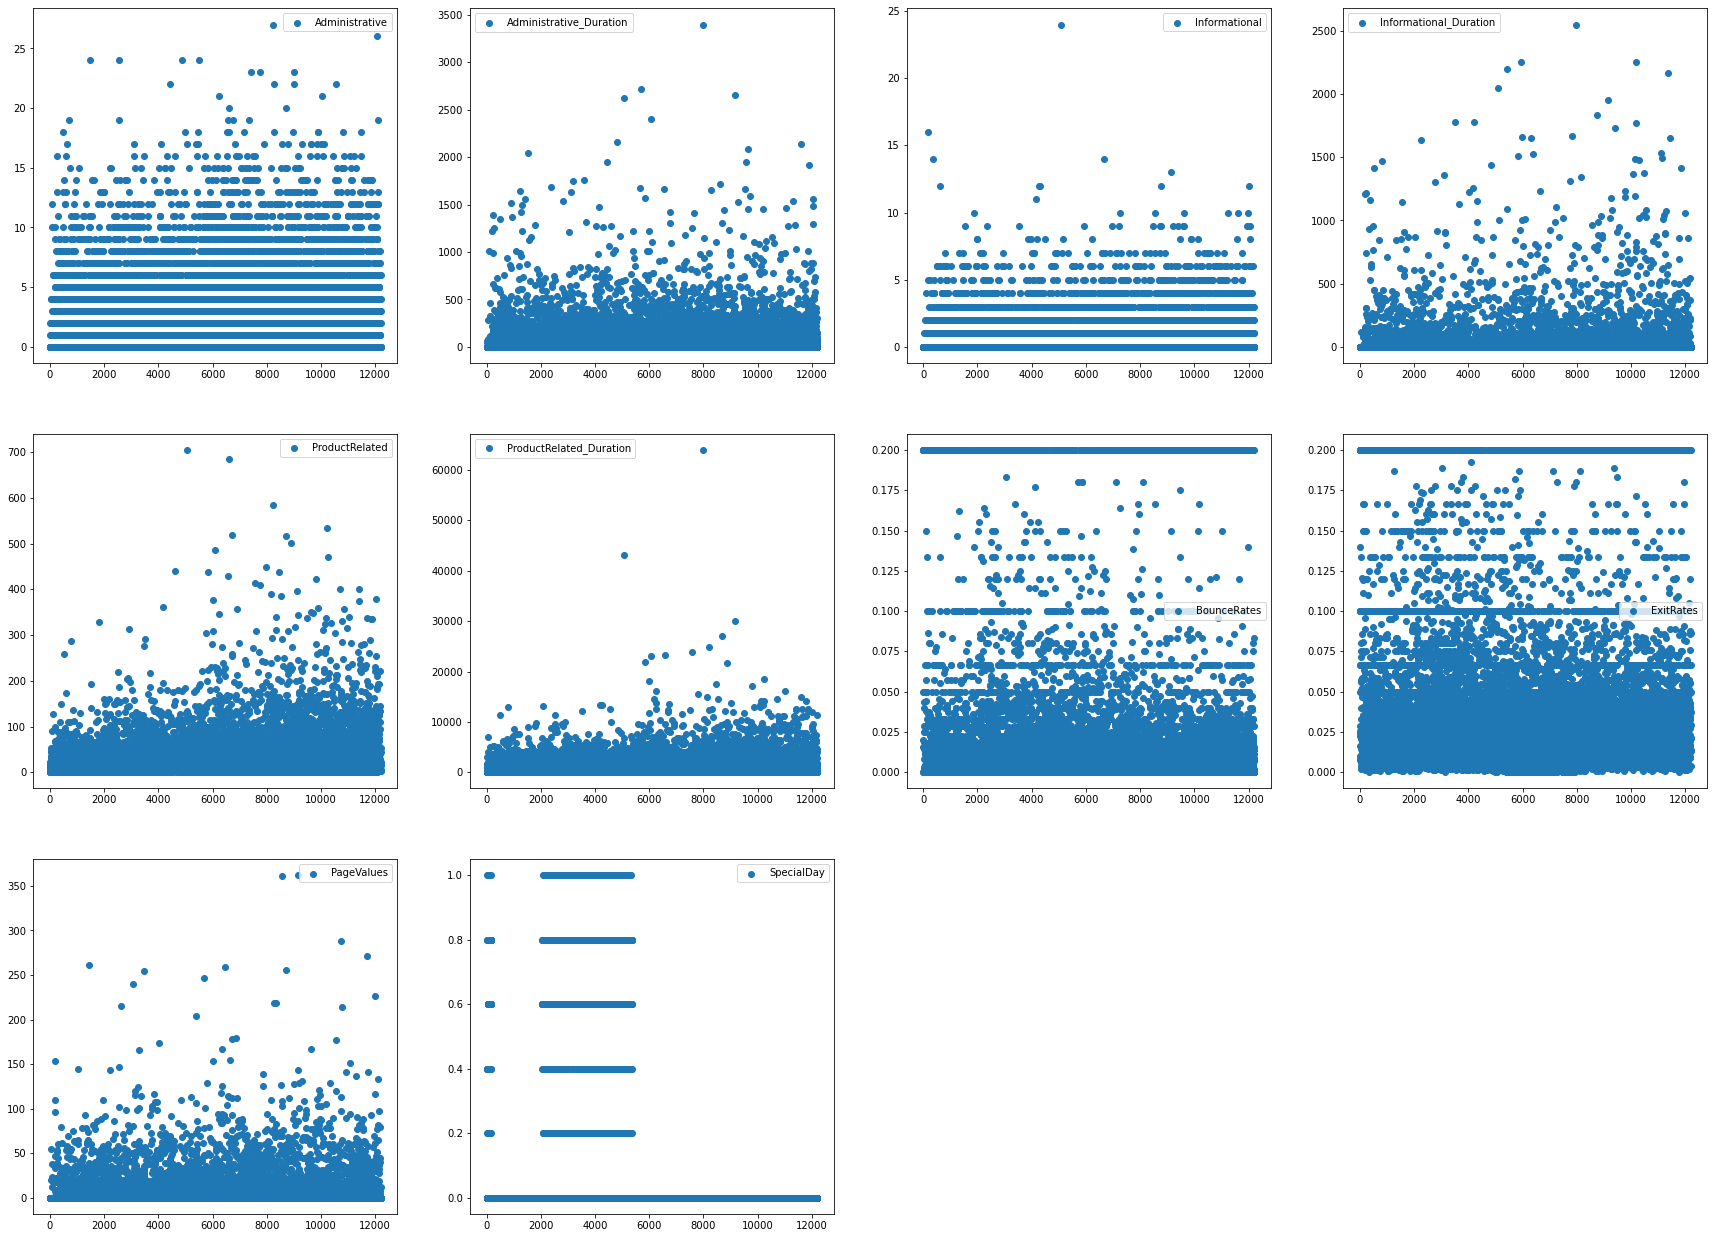

In [13]:
Data_index = np.arange(0,Data.shape[0],1).T

plt.figure(figsize=(30,30))

plt.subplot2grid((4,4), (0,0))
plt.scatter(Data_index, Data["Administrative"], label="Administrative")
plt.legend(loc='best')

plt.subplot2grid((4,4), (0,1))
plt.scatter(Data_index, Data["Administrative_Duration"], label="Administrative_Duration")
plt.legend(loc='best')

plt.subplot2grid((4,4), (0,2))
plt.scatter(Data_index, Data["Informational"], label="Informational")
plt.legend(loc='best')

plt.subplot2grid((4,4), (0,3))
plt.scatter(Data_index, Data["Informational_Duration"], label="Informational_Duration")
plt.legend(loc='best')

plt.subplot2grid((4,4), (1,0))
plt.scatter(Data_index, Data["ProductRelated"], label="ProductRelated")
plt.legend(loc='best')

plt.subplot2grid((4,4), (1,1))
plt.scatter(Data_index, Data["ProductRelated_Duration"], label="ProductRelated_Duration")
plt.legend(loc='best')

plt.subplot2grid((4,4), (1,2))
plt.scatter(Data_index, Data["BounceRates"], label="BounceRates")
plt.legend(loc='best')

plt.subplot2grid((4,4), (1,3))
plt.scatter(Data_index, Data["ExitRates"], label="ExitRates")
plt.legend(loc='best')

plt.subplot2grid((4,4), (2,0))
plt.scatter(Data_index, Data["PageValues"], label="PageValues")
plt.legend(loc='best')

plt.subplot2grid((4,4), (2,1))
plt.scatter(Data_index, Data["SpecialDay"], label="SpecialDay")
plt.legend(loc='best')

plt.show()

The presence of noise is very less compared to the size of the dataset. Hence the noise present in the system can be ignored.

## Separating the independent variable and dependent variable

In [14]:
X = Data.iloc[:,:-1]
Y = Data.iloc[:,-1]

In [15]:
categorical_features = ['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), categorical_features)], remainder='passthrough')
X = ct.fit_transform(X)

In [16]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,1.0
12201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,1.0
12202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,1.0
12203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,0.0


## Separating the dataset in training data and testing data

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [18]:
scale = MinMaxScaler()
X_train[:, 63:73] = scale.fit_transform(X_train[:, 63:73])
X_test[:, 63:73] = scale.transform(X_test[:, 63:73])

In [19]:
# Define a function for model evaluation
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Confusion Matrix of {model_name} is,\n")
    print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))
    print()
# Define your models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

def model_training():
    for model_name, model in models.items():
        print(f"Evaluating {model_name}:")
        evaluate_model(model, X_train, Y_train, X_test, Y_test, model_name)

## Model Training without SMOTE and SelectK-Best 

In [20]:
model = model_training() 

Evaluating Logistic Regression:
Confusion Matrix of Logistic Regression is,


Accuracy Score:  0.8836701256144184

Evaluating Random Forest:
Confusion Matrix of Random Forest is,


Accuracy Score:  0.9052430365920262

Evaluating SVC:
Confusion Matrix of SVC is,


Accuracy Score:  0.8596395412342982

Evaluating KNN:
Confusion Matrix of KNN is,


Accuracy Score:  0.846805024576734

Evaluating Decision Tree:
Confusion Matrix of Decision Tree is,


Accuracy Score:  0.8623702894593118



## Model Training with SMOTE

In [21]:
sm = SMOTE(random_state=20)
X_train, Y_train = sm.fit_resample(X_train, Y_train)
 
# Iterate over each model and evaluate
model_SMOTE = model_training()

Evaluating Logistic Regression:
Confusion Matrix of Logistic Regression is,


Accuracy Score:  0.8339705079191698

Evaluating Random Forest:
Confusion Matrix of Random Forest is,


Accuracy Score:  0.8902239213544512

Evaluating SVC:
Confusion Matrix of SVC is,


Accuracy Score:  0.842981977061715

Evaluating KNN:
Confusion Matrix of KNN is,


Accuracy Score:  0.6526488257782632

Evaluating Decision Tree:
Confusion Matrix of Decision Tree is,


Accuracy Score:  0.8511742217367558



## Model Training with SelectK-Best 

In [22]:
k = 20  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_train_kbest = selector.fit_transform(X_train, Y_train)
X_test_kbest = selector.transform(X_test)

model_KBest = model_training()

Evaluating Logistic Regression:


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [51 56] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Confusion Matrix of Logistic Regression is,


Accuracy Score:  0.8339705079191698

Evaluating Random Forest:
Confusion Matrix of Random Forest is,


Accuracy Score:  0.8910431458219552

Evaluating SVC:
Confusion Matrix of SVC is,


Accuracy Score:  0.842981977061715

Evaluating KNN:
Confusion Matrix of KNN is,


Accuracy Score:  0.6526488257782632

Evaluating Decision Tree:
Confusion Matrix of Decision Tree is,


Accuracy Score:  0.8563626433642818



## Model Training with SMOTE and SelectK-Best 

In [23]:
X_train, Y_train = sm.fit_resample(X_train, Y_train)
selector = SelectKBest(score_func=f_classif, k=k)
X_train_kbest = selector.fit_transform(X_train, Y_train)
X_test_kbest = selector.transform(X_test)

model_training_SMOTE_KBest = model_training()

Evaluating Logistic Regression:


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [51 56] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Confusion Matrix of Logistic Regression is,


Accuracy Score:  0.8339705079191698

Evaluating Random Forest:
Confusion Matrix of Random Forest is,


Accuracy Score:  0.8921354451119606

Evaluating SVC:
Confusion Matrix of SVC is,


Accuracy Score:  0.842981977061715

Evaluating KNN:
Confusion Matrix of KNN is,


Accuracy Score:  0.6526488257782632

Evaluating Decision Tree:
Confusion Matrix of Decision Tree is,


Accuracy Score:  0.8530857454942654



# Result

**Model Accuracy across different cases**

| Model | Normal Model Training | Model Training with SMOTE | Model Training with KBest | Model Training with SMOTE and KBest |
|-------|-----------------------|---------------------------|--------------------------|------------------------------------|
| Logistic Regression | 0.834 | 0.834 | 0.833 | 0.834 |
| Random Forest | 0.892 | 0.891 | **0.893** | 0.889 |
| SVC | 0.842 | 0.842 | 0.843 | 0.843 |
| KNN | 0.652 | 0.652 | 0.653 | 0.653 |
| Decision Tree | 0.86 | 0.857 | 0.852 | 0.852 |
